## Cuarto Desafío: `Daruich`, Nicolas Alberto
----

## Abstracto
Este proyecto de ciencia de datos se enfoca en prever el síndrome metabólico, destacando la accesibilidad de las poderosas herramientas de la ciencia de datos para cualquier persona interesada. Su propósito principal es demostrar que contribuir al ámbito médico no está reservado exclusivamente a expertos investigadores, ya que las capacidades de análisis de datos están al alcance de todos.

En este contexto, el proyecto no solo representa la aplicación de la ciencia de datos en el campo clínico específico del síndrome metabólico, sino que también subraya la importancia de la inclusividad en la generación de conocimiento. Fomenta la participación de individuos de diversas disciplinas en la investigación científica, abriendo nuevas oportunidades para contribuir a la comprensión y abordaje de condiciones médicas críticas.

El síndrome metabólico, abordado en este proyecto, es una condición que involucra varios factores de riesgo cardiovascular. La recopilación de un conjunto de datos completo, que incluye información sobre índice de masa corporal, niveles de glucosa, colesterol y otros indicadores clave, respalda el desarrollo de un modelo predictivo. Este enfoque, además de sus implicaciones médicas, sirve como un ejemplo tangible de cómo la ciencia de datos puede democratizarse, permitiendo que diversos perfiles contribuyan a la mejora de la salud y la investigación médica.

## Variables de Interes
- `Age` (Edad): Variable numérica que representa la edad de los individuos en el estudio.
- `Sex` (Sexo): Variable categórica que indica el género del individuo (por ejemplo, masculino o femenino).
- `Marital` (Estado Civil): Variable categórica que describe el estado civil de los participantes (soltero, casado, divorciado, etc.).
- `Income` (Ingresos): Variable numérica que representa el nivel de ingresos de los participantes.
- `Race` (Etnia): Variable categórica que indica la etnia de los participantes.
- `WaistCirc` (Circunferencia de la Cintura): Variable numérica que mide la circunferencia de la cintura.
- `BMI` (Índice de Masa Corporal): Variable numérica que calcula el índice de masa corporal.
- `Albuminuria` (Albuminuria): Variable que indica la presencia de proteínas en la orina, lo cual puede ser un marcador de daño renal.
- `UricAcid` (Ácido Úrico): Variable numérica que indica los niveles de ácido úrico en la sangre. Altos niveles pueden estar asociados con ciertos riesgos metabólicos.
- `BloodGlucose` (Glucosa en Sangre): Variable numérica que representa los niveles de glucosa en la sangre.
- `HDL` (Colesterol de Alta Densidad): Variable numérica que indica los niveles de colesterol HDL, también conocido como "colesterol bueno".
- `Triglycerides` (Triglicéridos): Variable numérica que indica los niveles de triglicéridos en la sangre, un factor de riesgo cardiovascular.
- `MetabolicSyndrome` (Síndrome Metabólico): Variable binaria que indica la presencia o ausencia del síndrome metabólico. Es la variable objetivo para la predicción en tu modelo.

----

In [457]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder

In [458]:
main_df = pd.read_csv('metabolicSyndrome.csv')

In [459]:
main_df.head()

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0


In [460]:
# Eliminando las columna 'seqn': 
main_df.drop(labels='seqn', axis='columns', inplace=True)

In [461]:
# Adecuando el nombre de los atributos
main_df.columns = ['Edad', 'Sexo', 'Marital', 'Ingresos', 'Raza', 'CirAbd', 'IMC', 'Albuminuria', 'Alb/Cre', 'Uricosuria', 'Glucemia', 'HDL', 'Trigliceridemia', 'SinMet']

In [462]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Edad             2401 non-null   int64  
 1   Sexo             2401 non-null   object 
 2   Marital          2193 non-null   object 
 3   Ingresos         2284 non-null   float64
 4   Raza             2401 non-null   object 
 5   CirAbd           2316 non-null   float64
 6   IMC              2375 non-null   float64
 7   Albuminuria      2401 non-null   int64  
 8   Alb/Cre          2401 non-null   float64
 9   Uricosuria       2401 non-null   float64
 10  Glucemia         2401 non-null   int64  
 11  HDL              2401 non-null   int64  
 12  Trigliceridemia  2401 non-null   int64  
 13  SinMet           2401 non-null   int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 262.7+ KB


In [463]:
main_df.describe().round(2)

,Edad,Ingresos,CirAbd,IMC,Albuminuria,Alb/Cre,Uricosuria,Glucemia,HDL,Trigliceridemia,SinMet
count,2401.00,2284.00,2316.00,2375.00,2401.00,2401.00,2401.00,2401.00,2401.00,2401.00,2401.00
mean,48.69,4005.25,98.31,28.70,0.15,43.63,5.49,108.25,53.37,128.13,0.34
std,17.63,2954.03,16.25,6.66,0.42,258.27,1.44,34.82,15.19,95.32,0.47
min,20.00,300.00,56.20,13.40,0.00,1.40,1.80,39.00,14.00,26.00,0.00
25%,34.00,1600.00,86.68,24.00,0.00,4.45,4.50,92.00,43.00,75.00,0.00
50%,48.00,2500.00,97.00,27.70,0.00,7.07,5.40,99.00,51.00,103.00,0.00
75%,63.00,6200.00,107.62,32.10,0.00,13.69,6.40,110.00,62.00,150.00,1.00
max,80.00,9000.00,176.00,68.70,2.00,5928.00,11.30,382.00,156.00,1562.00,1.00


----
----
### Analisis:

----
### `Edad`

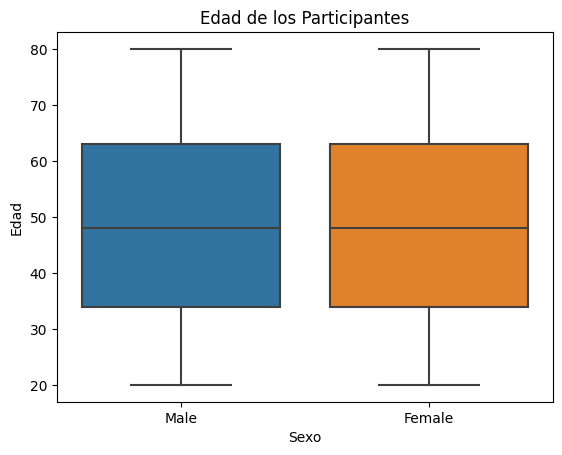

In [464]:
sns.boxplot(main_df, y="Edad", x="Sexo")

plt.title("Edad de los Participantes")
plt.xlabel("Sexo"), plt.ylabel("Edad");

- Se puede observar que la distribucion de edad es similar para ambos sexos. 
- Con una mediana en torno a los 50 años, el 50 % de la muestra se encuentra entre los 25 y 60 años (aprox). 
- Los participantes, en general, se encuentran entre los 20 y 80 años. No se observan valores atipicos.

- `Pregunta: ` Existe algun rango etareo sobre el cual sea mas prevalente el sindrome metabolico?

In [465]:
# Edad & Sindrome Metabolico
age_metabolic = main_df[['Edad', 'SinMet']]

age_labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
age_metabolic.loc[:,'Edad'] = pd.cut(age_metabolic['Edad'], bins=range(20,81,10), labels=age_labels)
age_metabolic = age_metabolic.groupby(['Edad', 'SinMet']).size().unstack(fill_value=0)

age_metabolic = (age_metabolic.div(age_metabolic.sum(axis=1), axis=0) * 100).round(2)
age_metabolic= age_metabolic.reset_index()

age_metabolic.columns = ['Edad', 'Negativo', 'Positivo']

print(age_metabolic)

    Edad  Negativo  Positivo
0  20-30     85.48     14.52
1  30-40     74.42     25.58
2  40-50     64.46     35.54
3  50-60     57.18     42.82
4  60-70     52.24     47.76
5  70-80     53.89     46.11


Text(0, 0.5, '% de Positivos')

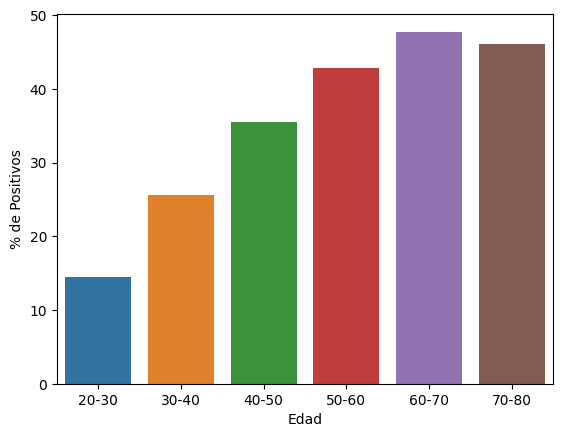

In [466]:
# Edad & Sindrome Metabolico: Grafico
sns.barplot(age_metabolic, x='Edad', y='Positivo')
plt.ylabel('% de Positivos')

Si bien el franja etarea mas afectada por el sindrome metabolico es la dispuesta entre los 60-70 años, podemos concluir que la chance de padecer aumenta con la edad.

----
----
### Analisis:

----
### `Sexo`

(Text(0.5, 0, 'Sexo'), Text(0, 0.5, 'Frecuencia'))

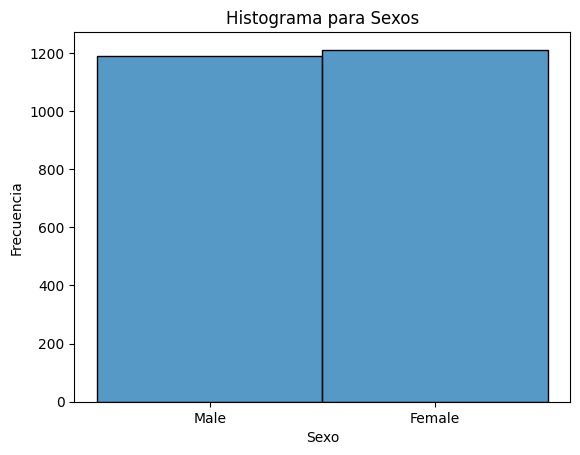

In [467]:
sns.histplot(main_df, x="Sexo")

plt.title("Histograma para Sexos")
plt.xlabel("Sexo"), plt.ylabel("Frecuencia")

- La frecuencia de ambos sexos es practicamente similar.
- `Pregunta`: La prevalencia de sindrome metabolico tambien lo es?

<Axes: xlabel='Sexo', ylabel='Count'>

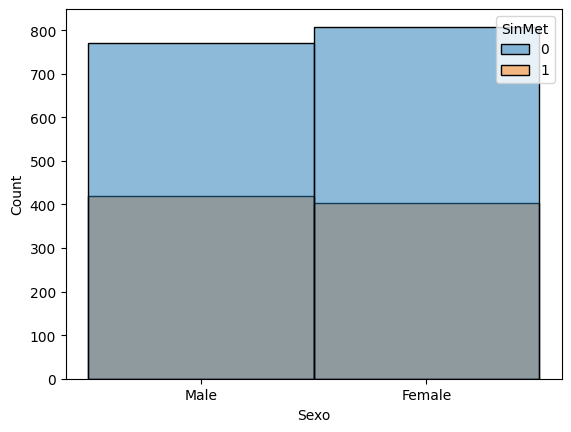

In [468]:
sns.histplot(main_df, x="Sexo", hue='SinMet')

----
### `Estado civil`

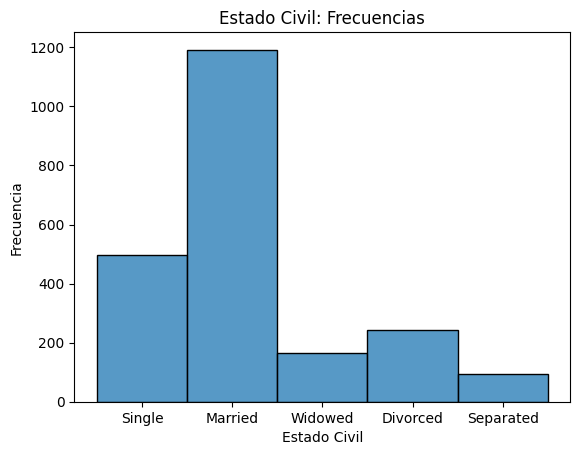

In [469]:
sns.histplot(main_df, x="Marital")

plt.title("Estado Civil: Frecuencias")
plt.xlabel("Estado Civil"), plt.ylabel("Frecuencia");

- Hay un franco predominio de individuos casados.
- Seria interesante agrupar a la muestra en solteros, casados y separados (separados, divorciados, y viudos)?

In [470]:
# Numero de participantes "separados" (separados, divorciados, y viudos)
separated  = main_df["Marital"][(main_df["Marital"] == "Widowed") | (main_df["Marital"] == "Divorced") | (main_df["Marital"] == "Separated")].count()

separated

503

In [471]:
# Porcentaje de "separados" en la muestra
(separated / main_df["Marital"].count()).round(2)

0.23

----
### `Ingresos`

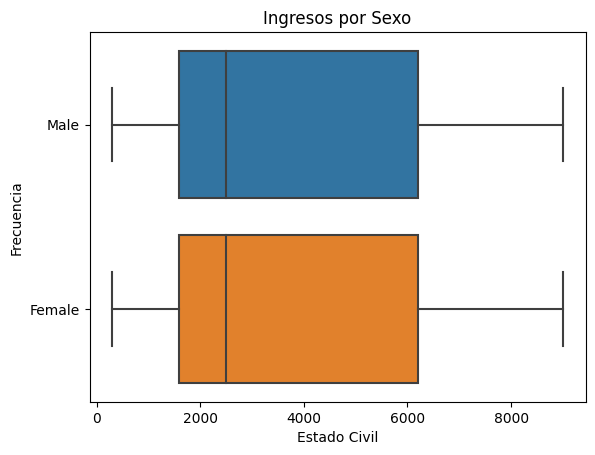

In [472]:
sns.boxplot(main_df, x="Ingresos", y="Sexo")

plt.title("Ingresos por Sexo")
plt.xlabel("Estado Civil"), plt.ylabel("Frecuencia");

- Al igual que con la edad, la distribucion de ingresos para ambos sexos es similar.

In [473]:
special_df = main_df.groupby("Sexo")["Ingresos"]

special_df.describe()

,count,mean,std,min,25%,50%,75%,max
Sexo,,,,,,,,
Female,1159.0,3916.824849,2943.454129,300.0,1600.0,2500.0,6200.0,9000.0
Male,1125.0,4096.355556,2963.438998,300.0,1600.0,2500.0,6200.0,9000.0


- Es llamativa, por lo menos, la paridad de los ingresos, en funcion del sexo, de la muestra en estudio. 

----
### `Raza`

(Text(0.5, 0, 'Razas'), Text(0, 0.5, 'Frecuencia'))

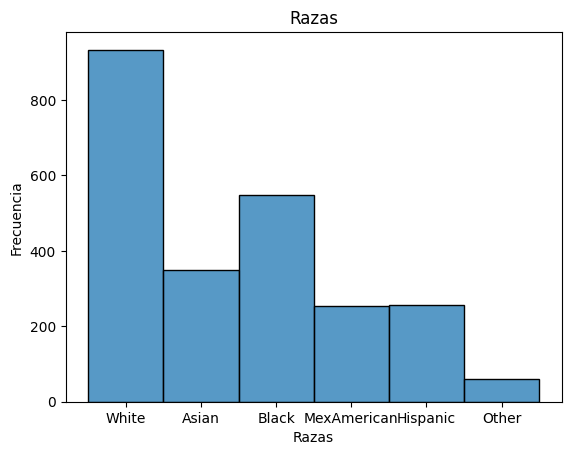

In [474]:
sns.histplot(main_df, x="Raza")

plt.title("Razas")
plt.xlabel("Razas"), plt.ylabel("Frecuencia")

- La etnia predominante es la blanca.
- `Pregunta:` Cual es la relacion de las diferentes etnias con el sindrome metabolico?

c:\Users\nical\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


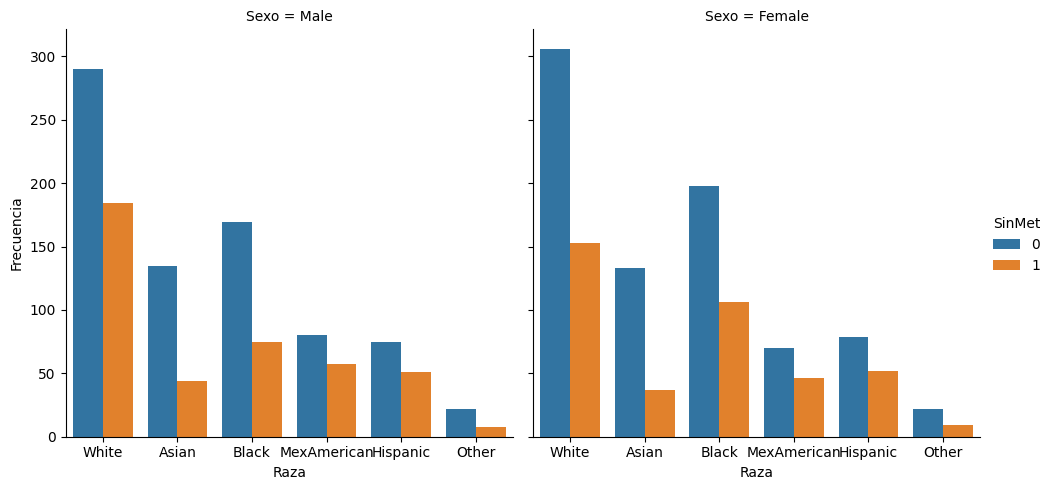

In [475]:
fig = sns.catplot(main_df, x='Raza', kind='count', col='Sexo', hue='SinMet')
fig.set_ylabels('Frecuencia'); fig.set_xlabels('Raza')

No se observan diferencias importantes en la prevalencia de sindrome metabolico cuando se comparan las etnias en funcion del sexo.

----
### `Circunferencia Abdominal`

(Text(0.5, 0, 'Circunferencia Abdominal (cm)'), Text(0, 0.5, 'Sexo'))

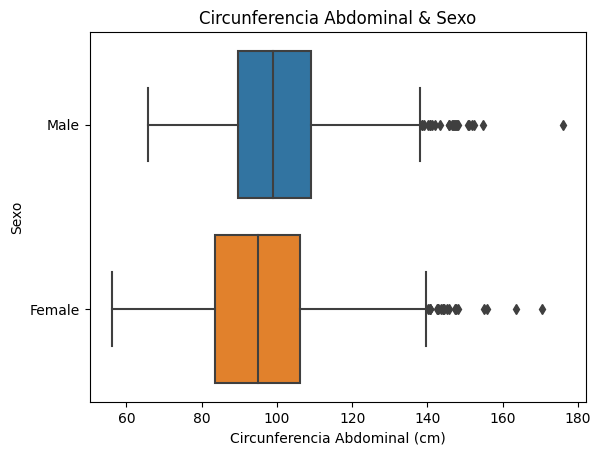

In [476]:
sns.boxplot(main_df, x="CirAbd", y="Sexo")

plt.title("Circunferencia Abdominal & Sexo")
plt.xlabel("Circunferencia Abdominal (cm)"), plt.ylabel("Sexo")

In [477]:
# TODO Removiendo los valores atipicos: Circunferencia Abdominal

In [478]:
# En general, se pueden encontrar las siguientes medidas
main_df["CirAbd"].describe()

count    2316.000000
mean       98.307254
std        16.252634
min        56.200000
25%        86.675000
50%        97.000000
75%       107.625000
max       176.000000
Name: CirAbd, dtype: float64

In [479]:
main_df.groupby("Sexo")["CirAbd"].describe()

,count,mean,std,min,25%,50%,75%,max
Sexo,,,,,,,,
Female,1162.0,96.341566,16.504544,56.2,83.625,95.0,106.2,170.5
Male,1154.0,100.286568,15.756044,65.8,89.600,99.0,109.0,176.0


- Las mujeres presentan valores minimos mas bajos que los hombres.
- Sin embargo, a medida que los valores incrementan, se vuelven similares.
- `Pregunta:` Existe alguna relacion entre el peso y la edad? Entre el peso y la etnia?

----
### `Indice de Masa Corporal`

(Text(0.5, 0, 'IMC'), Text(0, 0.5, 'Sexo'))

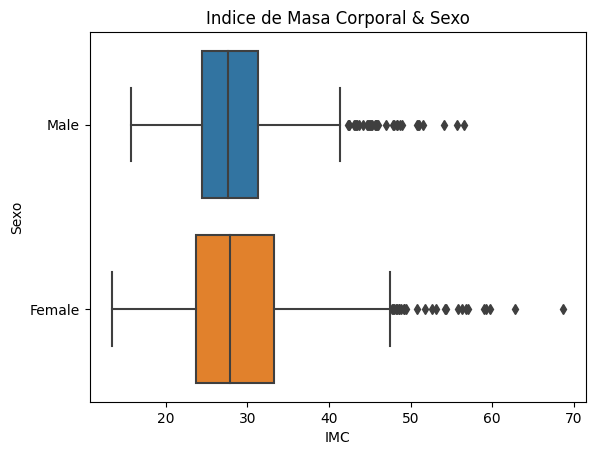

In [480]:
sns.boxplot(main_df, x="IMC", y="Sexo")

plt.title("Indice de Masa Corporal & Sexo")
plt.xlabel("IMC"), plt.ylabel("Sexo")

In [481]:
# TODO Removiendo los valores atipicos: IMC

In [482]:
main_df.groupby("Sexo")["IMC"].describe()

,count,mean,std,min,25%,50%,75%,max
Sexo,,,,,,,,
Female,1197.0,29.040267,7.323734,13.4,23.7,27.9,33.3,68.7
Male,1178.0,28.358659,5.898125,15.7,24.4,27.6,31.3,56.6


- Las mujeres presentan no solo un rango mayor, sino una mayor dispersion de los datos.
- Ademas, presentan valores atipicos que superan a los propios del hombre.
- `Pregunta:` Existe alguna relacion entre el IMC y la edad?

<Axes: xlabel='IMC', ylabel='Edad'>

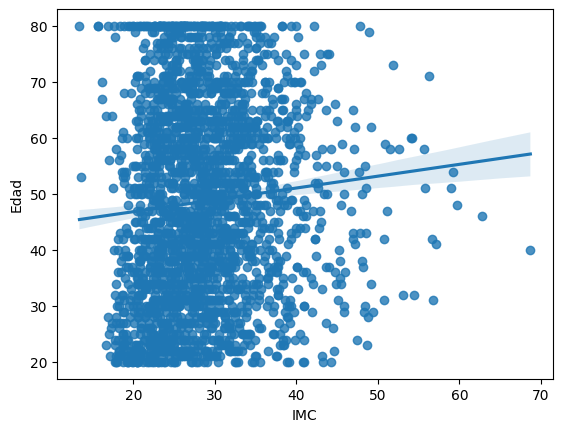

In [483]:
sns.regplot(main_df, x="IMC", y="Edad")

- Existen una ligera correlacion positiva entre la edad y el IMC.
- `Pregunta`: Dicha tendencia se acentua en algun sexo?

In [484]:
male_df = main_df[main_df["Sexo"] == "Male"]
female_df = main_df[main_df["Sexo"] == "Female"]

<Axes: xlabel='IMC', ylabel='Edad'>

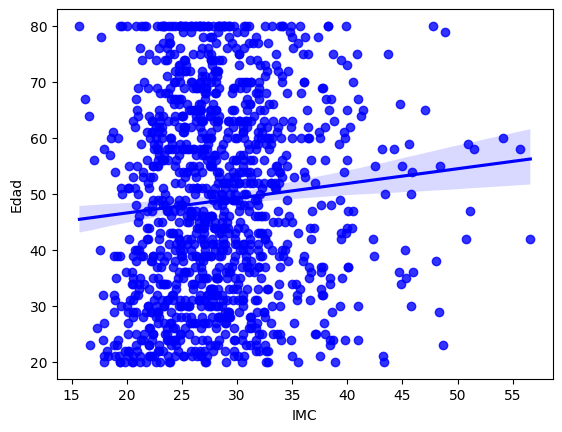

In [485]:
sns.regplot(male_df, x="IMC", y="Edad", color="Blue")

<Axes: xlabel='IMC', ylabel='Edad'>

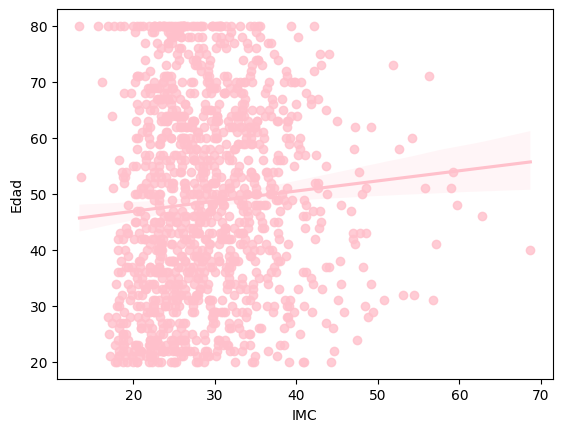

In [486]:
sns.regplot(female_df, x="IMC", y="Edad", color="Pink")

In [487]:
# TODO Agrupar los 2 graficos anteriores en un solo canvas

- No parece que la correlacion este asociada a algun sexo especifico.

----
### `Albuminuria`

([<matplotlib.axis.XTick at 0x19bb0ccc7d0>,
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

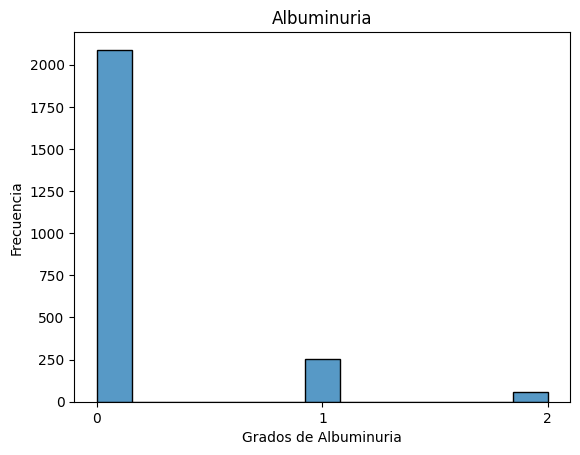

In [488]:
sns.histplot(main_df, x="Albuminuria")

plt.title("Albuminuria")
plt.xlabel("Grados de Albuminuria"), plt.ylabel("Frecuencia")
plt.xticks([0,1,2])

- La mayoria de los individuos no presenta albuminuria.
- `Pregunta:` Existe alguna relacion entre la albuminuria y la glucosa en sangre?

<Axes: xlabel='Glucemia', ylabel='Albuminuria'>

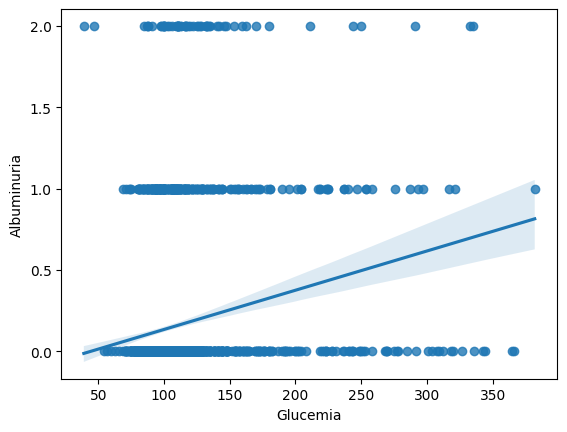

In [489]:
sns.regplot(main_df, x="Glucemia", y="Albuminuria")

- Existe una notable correlacion positiva entre la glucosa en sangre y la presencia de albumina en la orina.

In [490]:
# TODO Removiendo los valores atipicos: Albuminuria

----
### `Relacion Albumina/Creatina`

(Text(0.5, 0, 'Albumina/Creatina'), Text(0, 0.5, 'Sexo'))

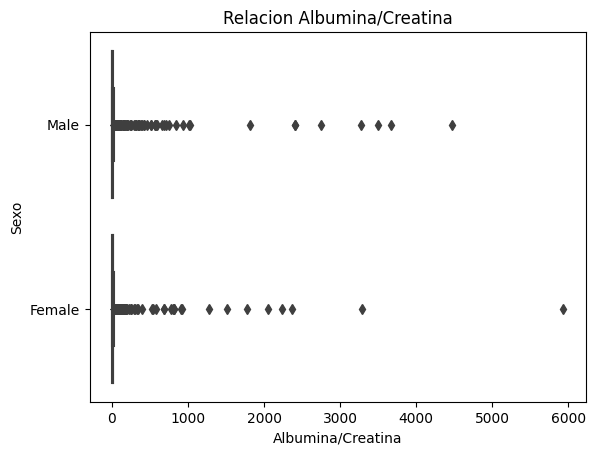

In [491]:
sns.boxplot(main_df, x="Alb/Cre", y="Sexo")

plt.title("Relacion Albumina/Creatina")
plt.xlabel("Albumina/Creatina"), plt.ylabel("Sexo")

- Se puede observar claramente la existencia de valores atipicos extremos.
- A su vez, dichos valores dificultan la interpretacion de los valores tipicos.

(Text(0.5, 0, 'Albumina/Creatina'), Text(0, 0.5, 'Sexo'))

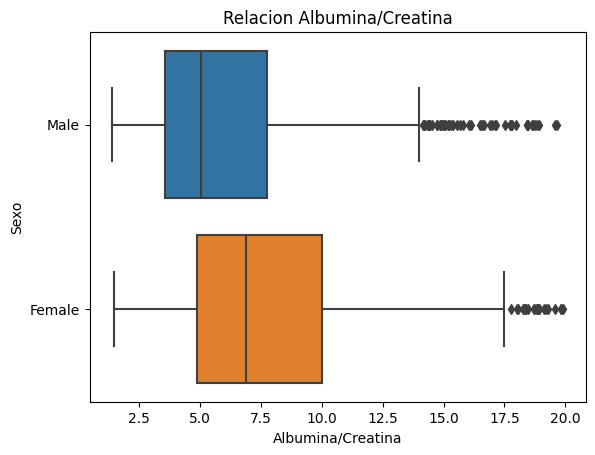

In [492]:
# Limitando la expresion de valores atipicos
sns.boxplot(main_df, x=main_df["Alb/Cre"][main_df["Alb/Cre"] < 20], y="Sexo")

plt.title("Relacion Albumina/Creatina")
plt.xlabel("Albumina/Creatina"), plt.ylabel("Sexo")

- Cuando se limitan los datos a aquellos menores de 20, se puede observar mejor las tendencias.
- Reproduciendo pautas anteriores, la mujer presenta una mayor dispersion de sus datos.
- Ademas, las mujeres presentan un mayor rango.
- `Pregunta:` Al igual que con la albuminuria, la relacion urinaria de albumina/creatina se correlaciona con la de glucemia?

<Axes: xlabel='Glucemia', ylabel='Alb/Cre'>

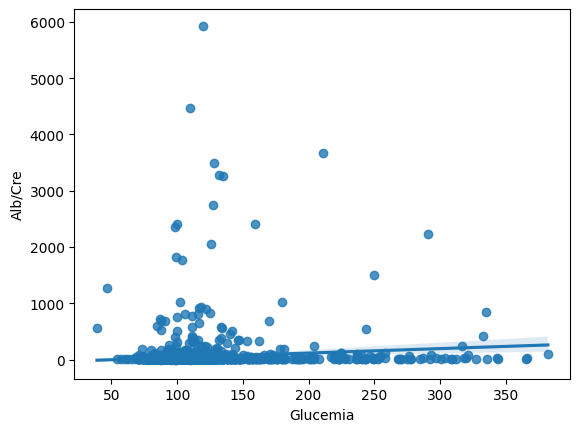

In [493]:
sns.regplot(main_df, x="Glucemia", y="Alb/Cre")

- En este caso, la correlacion, si bien positiva, es minima.
- `Pregunta:` Y si se desprecian los datos atipicos?

<Axes: xlabel='Glucemia', ylabel='Alb/Cre'>

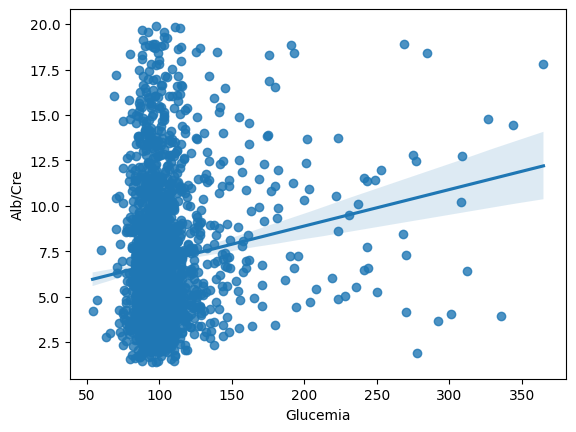

In [494]:
sns.regplot(main_df[main_df["Alb/Cre"] < 20], x="Glucemia", y="Alb/Cre")

- Efectivamente, la tendencia a la correlacion positiva mejora cuando se eliminan de la muestra los valores extremos.

In [495]:
# TODO Removiendo los valores atipicos: Alb/Cre

----
### `Uricosuria`

(Text(0.5, 0, 'Uricosuria'), Text(0, 0.5, 'Sexo'))

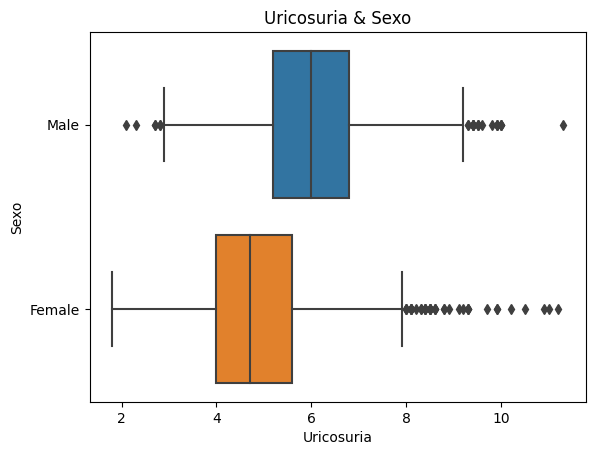

In [519]:
sns.boxplot(main_df, x="Uricosuria", y="Sexo")

plt.title("Uricosuria & Sexo")
plt.xlabel("Uricosuria"), plt.ylabel("Sexo")

- En contraste con el resto de los casos, es la primera vez que los hombres

In [498]:
# TODO Removiendo los valores atipicos: Uricosuria

----
### `Glucemia`

(Text(0.5, 0, 'Sexo'), Text(0, 0.5, 'Sexo'))

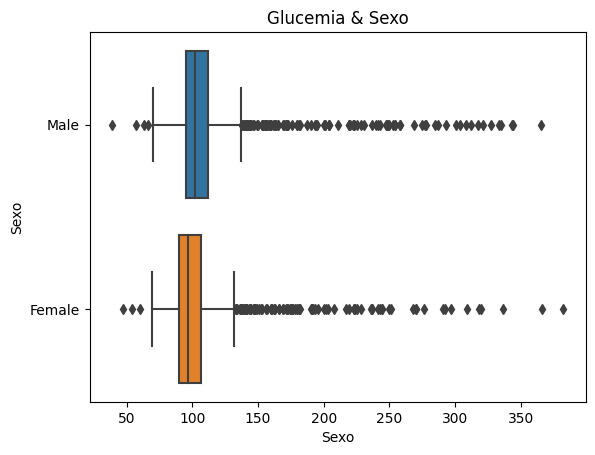

In [510]:
sns.boxplot(main_df, x="Glucemia", y='Sexo')

plt.title("Glucemia & Sexo")
plt.xlabel("Sexo"), plt.ylabel("Sexo")

In [505]:
# TODO Removiendo los valores atipicos: Glucemia

----
### `HDL`

(Text(0.5, 0, 'HDL (mg/dL)'), Text(0, 0.5, 'Sexo'))

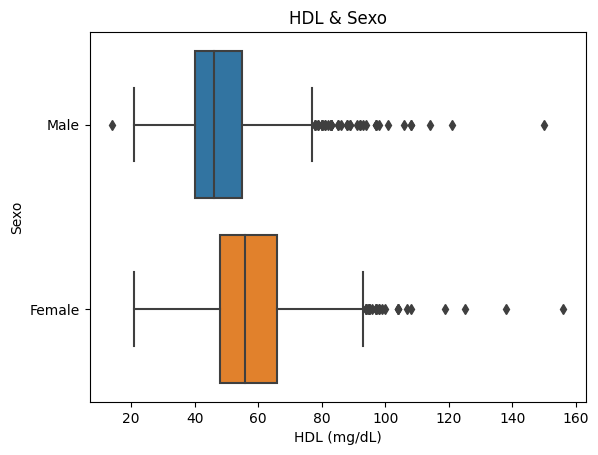

In [509]:
sns.boxplot(main_df, x="HDL", y='Sexo')

plt.title("HDL & Sexo")
plt.xlabel("HDL (mg/dL)"), plt.ylabel("Sexo")

In [512]:
# TODO Removiendo los valores atipicos: HDL

----
### `Trigliceridemia`

(Text(0.5, 0, 'Trigliceridemia (mg/dL)'), Text(0, 0.5, 'Sexo'))

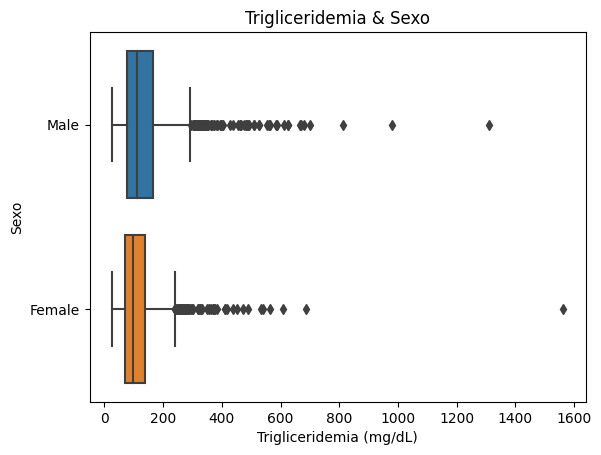

In [511]:
sns.boxplot(main_df, x="Trigliceridemia", y="Sexo")

plt.title("Trigliceridemia & Sexo")
plt.xlabel("Trigliceridemia (mg/dL)"), plt.ylabel("Sexo")

In [514]:
# TODO Removiendo los valores atipicos: Trigliceridemia
triglycerides_inliers = main_df["Trigliceridemia"][main_df["Trigliceridemia"] < 250]

(Text(0.5, 0, 'Trigliceridemia'), Text(0, 0.5, 'Sexo'))

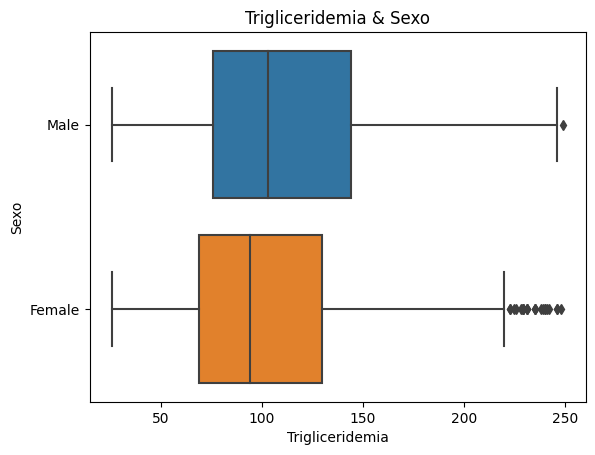

In [516]:
sns.boxplot(main_df, x=triglycerides_inliers, y="Sexo")

plt.title("Trigliceridemia & Sexo")
plt.xlabel("Trigliceridemia"), plt.ylabel("Sexo")

----
----
### Analisis: `Multivariados`

In [518]:
# TODO Heatmap de correlaciones
encoder = OneHotEncoder()

race_encoder = encoder.fit_transform(main_df[['Raza']]).toarray()

columns = encoder.get_feature_names_out(['Raza'])
main_df_encoded = pd.DataFrame(race_encoder, columns=columns)

main_df_encoded

,Raza_Asian,Raza_Black,Raza_Hispanic,Raza_MexAmerican,Raza_Other,Raza_White
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2396,0.0,0.0,0.0,0.0,1.0,0.0
2397,1.0,0.0,0.0,0.0,0.0,0.0
2398,0.0,0.0,0.0,1.0,0.0,0.0
2399,0.0,0.0,0.0,1.0,0.0,0.0
